In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('D:/AI_Bootcamp_Face_Dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/AI_Bootcamp_Face_Dataset/test\subject01.gif
D:/AI_Bootcamp_Face_Dataset/test\subject01.happy.gif
D:/AI_Bootcamp_Face_Dataset/test\subject02.centerlight.gif
D:/AI_Bootcamp_Face_Dataset/test\subject02.leftlight.gif
D:/AI_Bootcamp_Face_Dataset/test\subject03.glasses.gif
D:/AI_Bootcamp_Face_Dataset/test\subject03.leftlight.gif
D:/AI_Bootcamp_Face_Dataset/test\subject04.leftlight.gif
D:/AI_Bootcamp_Face_Dataset/test\subject04.surprised.gif
D:/AI_Bootcamp_Face_Dataset/test\subject05.sleepy.gif
D:/AI_Bootcamp_Face_Dataset/test\subject05.surprised.gif
D:/AI_Bootcamp_Face_Dataset/test\subject06.happy.gif
D:/AI_Bootcamp_Face_Dataset/test\subject06.leftlight.gif
D:/AI_Bootcamp_Face_Dataset/test\subject07.happy.gif
D:/AI_Bootcamp_Face_Dataset/test\subject07.leftlight.gif
D:/AI_Bootcamp_Face_Dataset/test\subject08.normal.gif
D:/AI_Bootcamp_Face_Dataset/test\subject08.rightlight.gif
D:/AI_Bootcamp_Face_Dataset/test\subject09.rightlight.gif
D:/AI_Bootcamp_Face_Dataset/test\subject09.sad.gif
D:/AI_

In [2]:
from matplotlib import pyplot as plt
import cv2
from PIL import Image

import mtcnn
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from os import listdir
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
DIRECTORY = 'D:/AI_Bootcamp_Face_Dataset/'
DIRECTORY_train='D:/AI_Bootcamp_Face_Dataset/train/'
DIRECTORY_test='D:/AI_Bootcamp_Face_Dataset/test/'

(243, 320, 3)


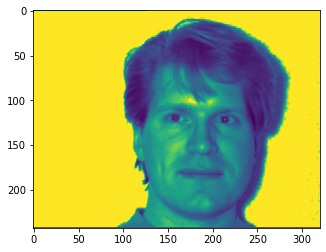

In [4]:
filename = 'D:/test/subject01.gif'
pixels = plt.imread(filename)
 
rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
print(rgb_pixels.shape)
plt.imshow(pixels)
plt.show()

In [5]:
detector = MTCNN()

results = detector.detect_faces(rgb_pixels)
results

[{'box': [121, 69, 122, 154],
  'confidence': 0.9999041557312012,
  'keypoints': {'left_eye': (160, 122),
   'right_eye': (214, 123),
   'nose': (189, 152),
   'mouth_left': (163, 182),
   'mouth_right': (210, 184)}}]

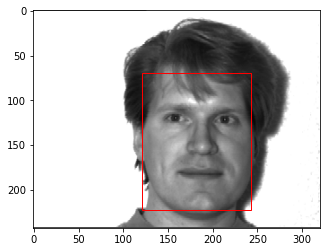

In [6]:
def draw_image_with_boxes(data, result_list):
    plt.imshow(data)
    ax = plt.gca()
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        ax.add_patch(rect)
    plt.show()

draw_image_with_boxes(rgb_pixels, results)

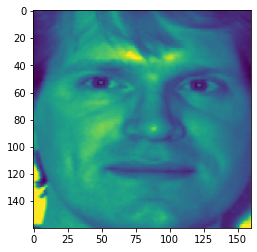

In [7]:
def extract_face_from_file(filename, required_size=(160, 160)):
    image = Image.open(filename)
    
    return extract_face(image, required_size)

def extract_face(image, required_size=(160, 160)):
    image = image.convert('RGB')
    pixels = np.asarray(image)
    results = detector.detect_faces(pixels)

    x1, y1, width, height = results[0]['box']
    
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    face = pixels[y1:y2, x1:x2]

    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    gray_face = cv2.cvtColor(face_array, cv2.COLOR_BGR2GRAY)
    
    return gray_face

detector = MTCNN()

face_pixels = extract_face_from_file("D:/test/subject01.gif")

plt.imshow(face_pixels)

In [8]:
def list_files(directory, contains):
    return list(f for f in listdir(directory) if contains in f)

100%|██████████| 16/16 [00:14<00:00,  1.10it/s]


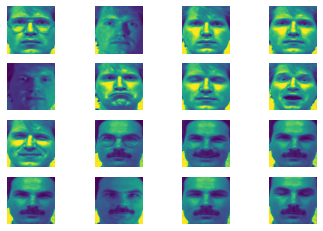

In [9]:
i = 1
faces = list()
for filename in tqdm(list_files(DIRECTORY_train, 'subject')[0:16]):
    # path
    path = DIRECTORY_train + filename
    # get face
    face = extract_face_from_file(path)
    # plot
    plt.subplot(4, 4, i)
    plt.axis('off')
    plt.imshow(face)
    faces.append(face)
    i += 1
plt.show()

In [10]:
filenames = pd.DataFrame(list_files(DIRECTORY_train, "subject"))

df_train = filenames[0].str.split(".", expand=True)
df_train["filename"] = filenames

df_train = df_train.rename(columns = {0:"subject", 1:"category"})
df_train['subject'] = df_train.subject.str.replace('subject' , '')
df_train.apply(pd.to_numeric, errors='coerce').dropna()
df_train['subject'] = pd.to_numeric(df_train["subject"])
df_train

,subject,category,2,filename
0,1,glasses,gif,subject01.glasses.gif
1,1,leftlight,gif,subject01.leftlight.gif
2,1,noglasses,gif,subject01.noglasses.gif
3,1,normal,gif,subject01.normal.gif
4,1,rightlight,gif,subject01.rightlight.gif
...,...,...,...,...
130,15,noglasses,gif,subject15.noglasses.gif
131,15,normal,gif,subject15.normal.gif
132,15,sleepy,gif,subject15.sleepy.gif
133,15,surprised,gif,subject15.surprised.gif


In [11]:
filenames2 = pd.DataFrame(list_files(DIRECTORY_test, "subject"))

df_test = filenames2[0].str.split(".", expand=True)
df_test["filename"] = filenames2

df_test = df_test.rename(columns = {0:"subject", 1:"category"})
df_test['subject'] = df_test.subject.str.replace('subject' , '')
df_test.apply(pd.to_numeric, errors='coerce').dropna()
df_test['subject'] = pd.to_numeric(df_test["subject"])
df_test

,subject,category,2,filename
0,1,gif,None,subject01.gif
1,1,happy,gif,subject01.happy.gif
2,2,centerlight,gif,subject02.centerlight.gif
3,2,leftlight,gif,subject02.leftlight.gif
4,3,glasses,gif,subject03.glasses.gif
5,3,leftlight,gif,subject03.leftlight.gif
6,4,leftlight,gif,subject04.leftlight.gif
7,4,surprised,gif,subject04.surprised.gif
8,5,sleepy,gif,subject05.sleepy.gif
9,5,surprised,gif,subject05.surprised.gif


In [12]:
x_train=df_train.loc[:,['category','filename']]
x_test=df_test.loc[:,['category','filename']]
y_train=df_train.loc[:,['subject']]
y_test=df_test.loc[:,['subject']]

In [13]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [14]:
y_train = y_train.tolist()
y_test = y_test.tolist()

In [15]:
detector = MTCNN()

def load_dataset1(dataset):
    faces = list()
    for filename in tqdm(dataset["filename"]):
        path = DIRECTORY_train + filename
        # get face
        face = extract_face_from_file(path)
        faces.append(face)
    return np.asarray(faces)

In [16]:
detector = MTCNN()

def load_dataset2(dataset):
    faces = list()
    for filename in tqdm(dataset["filename"]):
        path = DIRECTORY_test + filename
        # get face
        face = extract_face_from_file(path)
        faces.append(face)
    return np.asarray(faces)

In [17]:
x_test = load_dataset2(x_test)
x_train = load_dataset1(x_train)

print(x_test.shape)
print(x_train.shape)

100%|██████████| 135/135 [01:55<00:00,  1.17it/s]

(30, 160, 160)
(135, 160, 160)


In [18]:
TRAINING_DATA_DIRECTORY = "data/train"
TESTING_DATA_DIRECTORY = "data/test"
NUM_CLASSES = 15
EPOCHS = 25
BATCH_SIZE = 20
NUMBER_OF_TRAINING_IMAGES = 135
NUMBER_OF_TESTING_IMAGES = 30
IMAGE_HEIGHT = 160
IMAGE_WIDTH = 160

In [19]:
import os 

def save_keras_dataset(setname, dataset, labels, per_class):
    data = sorted(list(zip(labels, dataset)), key=lambda x: x[0])

    j = 0
    for label, gray_img in tqdm(data):
        j = (j% per_class) + 1
        
        directory = f"data/{setname}/class_{label}/"
        if not os.path.exists(directory):
                os.makedirs(directory)
        cv2.imwrite(f"{directory}class_{label}_{j}.png",gray_img)

In [20]:
import shutil
shutil.rmtree(r'data', ignore_errors=True)

# Save datasets
save_keras_dataset("test", x_test, y_test, 3)
save_keras_dataset("train", x_train, y_train, 8)

100%|██████████| 135/135 [00:00<00:00, 486.18it/s]


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def data_generator():
    return ImageDataGenerator(
        rescale=1./255,
        
    )

def add_noise(img):
    """Add random noise to an image"""
    VARIABILITY = 35
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

In [22]:
training_generator = data_generator().flow_from_directory(
    TRAINING_DATA_DIRECTORY,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale'
)

testing_generator = data_generator().flow_from_directory(
    TESTING_DATA_DIRECTORY,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    class_mode='categorical',
    color_mode='grayscale'
)

validation_generator = data_generator().flow_from_directory(
    TESTING_DATA_DIRECTORY,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)

Found 120 images belonging to 15 classes.
Found 30 images belonging to 15 classes.
Found 30 images belonging to 15 classes.


In [23]:
import keras
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [24]:
from tensorflow.keras import models
from tensorflow.keras.layers import Activation, ZeroPadding2D, MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers, constraints

model = models.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 1), padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_initializer="glorot_uniform", kernel_regularizer=regularizers.l2(l2=0.01)))

model.add(MCDropout(rate=0.5))

model.add(Dense(NUM_CLASSES, activation='softmax', kernel_initializer="glorot_uniform"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 160, 160, 32)      320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 80, 80, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 78, 78, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 39, 39, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 18, 18, 128)      0

In [26]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [27]:
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

model.compile(
    loss=losses.CategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(learning_rate=0.0003),
    metrics=["accuracy"]
)

history = model.fit(
    training_generator,
    steps_per_epoch=(NUMBER_OF_TRAINING_IMAGES//BATCH_SIZE ),
    epochs=EPOCHS,
    validation_data=testing_generator,
    shuffle=True,
    validation_steps=(NUMBER_OF_TESTING_IMAGES//BATCH_SIZE),
#     callbacks=[early_stopping]
)

Epoch 1/25


C:\Users\LENOVO\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


6/6 [==============================] - 13s 2s/step - loss: 12.9194 - accuracy: 0.0667 - val_loss: 11.1353 - val_accuracy: 0.0333
Epoch 2/25
6/6 [==============================] - 10s 2s/step - loss: 10.0781 - accuracy: 0.1167 - val_loss: 8.8102 - val_accuracy: 0.1333
Epoch 3/25
6/6 [==============================] - 10s 2s/step - loss: 8.0189 - accuracy: 0.1583 - val_loss: 7.0612 - val_accuracy: 0.2000
Epoch 4/25
6/6 [==============================] - 10s 2s/step - loss: 6.4605 - accuracy: 0.2750 - val_loss: 5.8263 - val_accuracy: 0.1667
Epoch 5/25
6/6 [==============================] - 10s 2s/step - loss: 5.3524 - accuracy: 0.2833 - val_loss: 4.9597 - val_accuracy: 0.4000
Epoch 6/25
6/6 [==============================] - 10s 2s/step - loss: 4.5777 - accuracy: 0.3917 - val_loss: 4.2684 - val_accuracy: 0.3667
Epoch 7/25
6/6 [==============================] - 13s 2s/step - loss: 3.7308 - accuracy: 0.6083 - val_loss: 3.7745 - val_accuracy: 0.5333
Epoch 8/25
6/6 [==========================

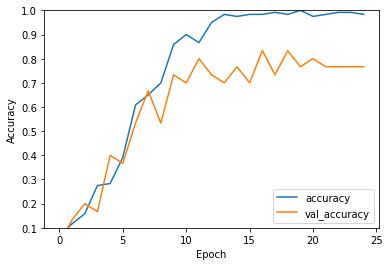

In [28]:
plot_folder = "plot"
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

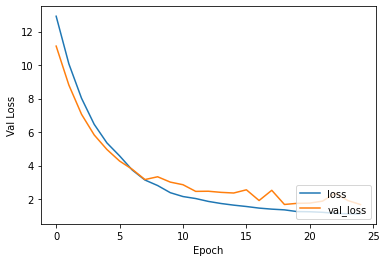

In [29]:
plot_folder = "plot"
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Val Loss')
plt.legend(loc='lower right')

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(validation_generator.classes, y_pred))
print(validation_generator.classes)
print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         2
           7       0.50      0.50      0.50         2
           8       1.00      0.50      0.67         2
           9       0.67      1.00      0.80         2
          10       0.67      1.00      0.80         2
          11       0.00      0.00      0.00         2
          12       1.00      0.50      0.67         2
          13       0.50      1.00      0.67         2
          14       0.50      0.50      0.50         2

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.74        30
weighted avg       0.77   

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
